# Домашнее задание 1

**Выполнил:** <Уткин Андрей Сергеевич>

**На сколько выполнил:** <10.45>

**Правила игры:**

* возле каждой задачи указано число баллов (в сококупности можно получить 10 баллов)

* дополнительные задачи выделены звездочкой (также указано число баллов). Данные баллы можно будет использовать для улучшения результата за любое домашнее задание

* все подсчеты необходимо делать с помощью pandas-numpy (использовать как можно меньше циклов, за использование циклов, где это не требуются, будем штрафовать)

* для визуализации можно использовать matplotlib-seaborn-plotly (учтите, что все графики должны выглядеть опрятно, иметь название-подписи, за нечитабельные графики будем штрафовать)

* возможно, что в данных есть пустоты и невалидные значения. Перед началом любой работы необходимо исследовать, и если такие есть, убрать их

* соблюдайте чистоту кода: переменные должны быть осмысленными, не повторяйтесь, если в этом нет необходимости (иначе используйте функции). Чем чище код - тем проще нам поставить вам хорошую оценку :)

* общая рекомендация: на вопросы со звездочкой отвечать в самом конце, возможно, будет проще)

## Данные 

В этом домашнем задании вам придется оказаться на месте аналитика в бразильском маркетплейсе [Olist](https://olist.com/pt-br/). Вам необходимо исследовать данные и на их основании сделать выводы, которые помогут бизнесу расцветать!

Данные находятся тут: (будет ссылка)

Ван дано 9 датасетов, которые содержат в себе все данные по 100 000 заказам со всей Бразилии. Чтобы облегчить вам жизнь, вот связи по этим датасетам (файл product_category_name_translation является переводом названий категорий с бразильского на английский)

![](https://i.imgur.com/HRhd2Y0.png)

Ну что же, начнем, пожалуй!

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [10]:
!wget https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip

--2022-10-14 09:03:01--  https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Palladain/Deep_Python/main/Homeworks/Homework_1/archive.zip [following]
--2022-10-14 09:03:01--  https://raw.githubusercontent.com/Palladain/Deep_Python/main/Homeworks/Homework_1/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44717580 (43M) [application/zip]
Saving to: ‘archive.zip.1’

archive.zip.1       100%[===================>]  42.65M  --.-KB/s    in 0.1s    

2022-10-14 09:03:01 (297 MB/s) - ‘archive.zip.1’ saved [44717580/

In [11]:
!unzip archive.zip

Archive:  archive.zip
replace olist_customers_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
translation = pd.read_csv("product_category_name_translation.csv")


In [13]:
d = dict()
def Translate(x):
  if x in d.keys():
    return d[x]
  return x
for i in range(len(translation)):
  d[translation.loc[i][0]] = translation.loc[i][1]
products = products.dropna()
products["product_category_name"] = products["product_category_name"].apply(lambda x: Translate(x))


## Задание 1 (0.4 балла) +

Определите:

* Число товаров
* Среднюю стоимость товара

в разрезе категорий (все категории должны быть на английском языке)

In [14]:
temp_dat = pd.DataFrame()
q = order_items.sort_values("product_id").drop_duplicates(["product_id","price"]).groupby("product_id").agg({"price":"mean"})
q = q.set_index(np.arange(len(q)))
temp_dat["product_id"] = products.sort_values(by="product_id").product_id
temp_dat["product_category_name"] =  products.sort_values(by="product_id").product_category_name
temp_dat = temp_dat.reset_index(drop=True)
temp_dat["price"] = q
temp_dat.groupby("product_category_name").mean()

,price
product_category_name,
agro_industry_and_commerce,137.059887
air_conditioning,118.540194
art,137.666723
arts_and_craftmanship,205.651842
audio,136.370428
...,...
stationery,135.690543
tablets_printing_image,183.221111
telephony,147.205774


In [15]:
temp_dat.groupby("product_category_name").agg({"product_id":"count"}).rename(columns={"price":"amount"})

,product_id
product_category_name,
agro_industry_and_commerce,74
air_conditioning,124
art,55
arts_and_craftmanship,19
audio,58
...,...
stationery,849
tablets_printing_image,9
telephony,1134


## Задание 2 (1,5 балла) +

Определите для каждого продавца основную категорию их продаж.

Отобразите категории по числу продавцов, для которых данная категория основная, а также создайте график, по которому можно выбрать отдельно штат и посмотреть такое же распределение



In [16]:
temp_data = order_items[["product_id","seller_id"]].merge(sellers[["seller_id","seller_state"]], on=["seller_id"])
temp_data2 = temp_data.merge(products[["product_id","product_category_name"]],on=["product_id"])
temp_data3 = temp_data2.groupby(["seller_id", "product_category_name","seller_state"]).agg({"product_id":"count"}).reset_index().sort_values("product_id").drop_duplicates("seller_id", keep="last").rename(columns={"product_id":"amount"})
temp_data3

,seller_id,product_category_name,seller_state,amount
3033,77128dec4bec4878c37ab7d6169d6f26,food_drink,SP,1
3024,76de363de16dacc923eec8daf91df504,cool_stuff,SC,1
3061,7816cd9c5b1238e320545f5bf7eb80e8,garden_tools,SP,1
3062,781a66c0d89e30814d49fe8b5e14cd07,cool_stuff,SP,1
3068,78813699ffac347fe27dba345a5f1551,drinks,RS,1
...,...,...,...,...
5375,da8622b14eb17ae2831f4ac5b9dab84a,bed_bath_table,SP,1277
389,1025f0e2d44d7041d6cf58b6550e0bfa,furniture_decor,SP,1292
1815,4a3ca9315b744ce9f8e9374361493884,bed_bath_table,SP,1572
2537,6560211a19b47992c3666cc44a7e94c0,watches_gifts,SP,1628


In [17]:
#Часть 2
temp_data3.groupby("product_category_name").agg({"seller_id":"count"}).rename(columns={"seller_id":"sellers_amount"}).sort_values("sellers_amount")

,sellers_amount
product_category_name,
pc_gamer,1
la_cuisine,1
flowers,1
furniture_mattress_and_upholstery,1
tablets_printing_image,1
...,...
auto,214
furniture_decor,224
housewares,258


In [18]:
temp_data3 = temp_data3.groupby(["seller_state","product_category_name"]).agg({"seller_id":"nunique"}).rename(columns={"seller_id":"sellers_amount"}).sort_values("sellers_amount").reset_index()

In [19]:
cols = sellers.seller_state.unique()

fig = go.Figure()

#нарисуем все распределения
for col in cols:
  temp_data = order_items[["product_id","seller_id"]].merge(sellers[["seller_id","seller_state"]], on=["seller_id"])
  temp_data2 = temp_data.merge(products[["product_id","product_category_name"]],on=["product_id"])
  temp_data3 = temp_data2.groupby(["seller_id", "product_category_name","seller_state"]).agg({"product_id":"count"}).reset_index().sort_values("product_id").drop_duplicates("seller_id", keep="last").rename(columns={"product_id":"amount"})
  temp_data3 = temp_data3[temp_data3.seller_state == col].groupby(["product_category_name"]).agg({"seller_id":"nunique"}).rename(columns={"seller_id":"sellers_amount"}).sort_values("sellers_amount").reset_index()
  t = pd.DataFrame()
  t["product_category_name"] = products.product_category_name.unique()
  t = t.merge(temp_data3,on="product_category_name",how='left')
  t = t.where(pd.notnull(t), 0)
  fig.add_trace(go.Bar(x=t.product_category_name, y = t.sellers_amount, opacity=0.6))
    
# Наше меню для отображения
updatemenu= [dict()]

# Кнопки, на которые можно нажимать
buttons=[]

for i, col in enumerate(cols):
    visibles = [False] * len(cols)
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=["visible", visibles]
                        ))
    
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True

fig.update_layout(showlegend=False, updatemenus = updatemenu)
go.layout.Updatemenu(x=0, y=1)
fig.update_layout(
    title = {
        "text": "Product Category distribution",
        "x": 0.5
    })

fig.show()

## Задание 3 (1,5 балл) +

Покажите процент

* суммы покупок в деньгах

* суммы покупок в штуках

по категории для доставленных заказов, а также разбивку по штатам

In [20]:
temp_data = orders[["order_id", "customer_id","order_status"]].merge(order_items[["order_id","product_id","price"]], on="order_id")
temp_data = temp_data[["product_id","price","order_status"]].merge(products[["product_id","product_category_name"]], on = "product_id")
temp_data = temp_data[temp_data.order_status == "delivered"].groupby("product_category_name").agg({"price":"sum"}).sort_values("price").rename(columns={"price":"sum_price"})
all = temp_data.sum_price.sum()
temp_data["percent"] = temp_data.sum_price/all*100
print(all)

13048837.480000002


In [21]:
temp_data = orders[["order_id", "customer_id","order_status"]].merge(order_items[["order_id","product_id","price"]], on="order_id")
temp_data = temp_data[["product_id","price","order_status"]].merge(products[["product_id","product_category_name"]], on = "product_id")
temp_data = temp_data[temp_data.order_status == "delivered"].groupby("product_category_name").agg({"price":"count"}).sort_values("price").rename(columns={"price":"count_things"})
all = temp_data.count_things.sum()
temp_data["percent"] = temp_data.count_things/all*100
temp_data

,count_things,percent
product_category_name,,
security_and_services,2,0.001841
fashion_childrens_clothes,7,0.006442
pc_gamer,8,0.007362
la_cuisine,14,0.012884
portateis_cozinha_e_preparadores_de_alimentos,14,0.012884
...,...,...
computers_accessories,7644,7.034852
furniture_decor,8160,7.509732
sports_leisure,8431,7.759136


In [22]:
temp_data = orders[["order_id", "customer_id","order_status"]].merge(order_items[["order_id","product_id","price"]], on="order_id")
temp_data = temp_data.merge(customers[["customer_id","customer_state"]], on = "customer_id")
temp_data = temp_data[["product_id","price","order_status", "customer_state"]].merge(products[["product_id","product_category_name"]], on = "product_id")
cols = temp_data.customer_state.unique()

fig = go.Figure()

#нарисуем все распределения
for col in cols:
  dat1 = temp_data[(temp_data.order_status == "delivered") & (temp_data.customer_state == col)].groupby("product_category_name").agg({"price":"sum"}).rename(columns={"price":"sum_price"}).reset_index()
  all = dat1.sum_price.sum()
  dat1["percent"] = dat1.sum_price/all*100
  t = pd.DataFrame()
  t["product_category_name"] = products.product_category_name.unique()
  t = t.merge(dat1,on="product_category_name",how='left')
  t = t.where(pd.notnull(t), 0)
  fig.add_trace(go.Bar(x=t.product_category_name, y = t.percent, opacity=0.6))
    
# Наше меню для отображения
updatemenu= [dict()]

# Кнопки, на которые можно нажимать
buttons=[]

for i, col in enumerate(cols):
    visibles = [False] * len(cols)
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=["visible", visibles]
                        ))
    
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True

fig.update_layout(showlegend=False, updatemenus = updatemenu)
go.layout.Updatemenu(x=0, y=1)
fig.update_layout(
    title = {
        "text": "percentage of the amount of purchases in money by state",
        "x": 0.5
    })

fig.show()

In [23]:
temp_data = orders[["order_id", "customer_id","order_status"]].merge(order_items[["order_id","product_id","price"]], on="order_id")
temp_data = temp_data.merge(customers[["customer_id","customer_state"]], on = "customer_id")
temp_data = temp_data[["product_id","price","order_status", "customer_state"]].merge(products[["product_id","product_category_name"]], on = "product_id")
cols = temp_data.customer_state.unique()

fig = go.Figure()

#нарисуем все распределения
for col in cols:
  dat1 = temp_data[(temp_data.order_status == "delivered") & (temp_data.customer_state == col)].groupby("product_category_name").agg({"price":"count"}).rename(columns={"price":"count_things"}).reset_index()
  all = dat1.count_things.count()
  dat1["percent"] = dat1.count_things/all*100
  t = pd.DataFrame()
  t["product_category_name"] = products.product_category_name.unique()
  t = t.merge(dat1,on="product_category_name",how='left')
  t = t.where(pd.notnull(t), 0)
  fig.add_trace(go.Bar(x=t.product_category_name, y = t.percent, opacity=0.6))
    
# Наше меню для отображения
updatemenu= [dict()]

# Кнопки, на которые можно нажимать
buttons=[]

for i, col in enumerate(cols):
    visibles = [False] * len(cols)
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=["visible", visibles]
                        ))
    
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True

fig.update_layout(showlegend=False, updatemenus = updatemenu)
go.layout.Updatemenu(x=0, y=1)
fig.update_layout(
    title = {
        "text": "percentage of the amount of purchases in pieces by state",
        "x": 0.5
    })

fig.show()

## Задание 4 (0.6 балла) +

Визуализируйте зависимость между средним числом покупок и:

* числом фотографий товара

* кол-во символов в описании товара (аггрегируйте с шагом 20)

* кол-во символов в названии (аггрегируйте с шагом 5)

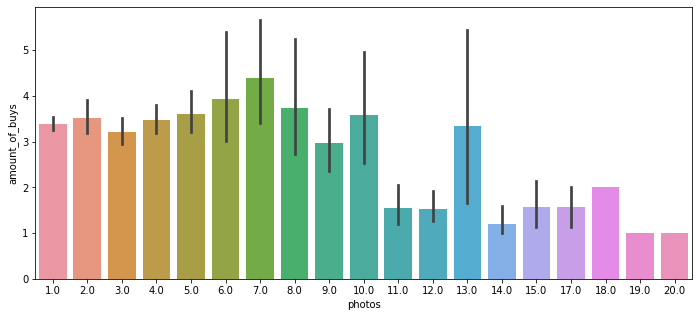

In [24]:
data = order_items[["order_id","product_id"]].merge(orders[["order_id","order_status"]], on="order_id")
data = data[data.order_status == "delivered"].groupby("product_id").agg({"order_id":"count"}).rename(columns={"order_id":"amount_of_buys"}).reset_index()
data1 = data.merge(products[["product_id","product_photos_qty"]], on="product_id").rename(columns={"product_photos_qty":"photos"})
plt.figure(figsize=(40,5))
plt.subplot(131)
sns.barplot(data = data1, y="amount_of_buys",x="photos")


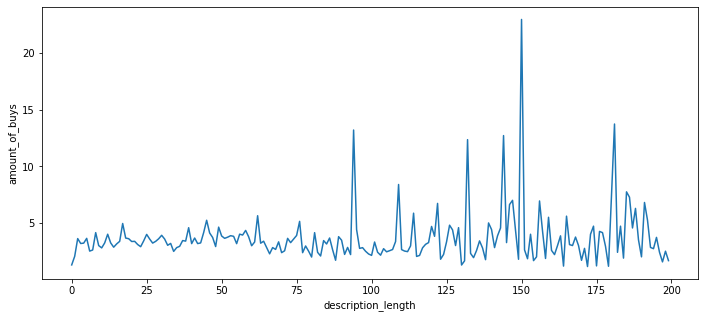

In [25]:
data = order_items[["order_id","product_id"]].merge(orders[["order_id","order_status"]], on="order_id")
data = data[data.order_status == "delivered"].groupby("product_id").agg({"order_id":"count"}).rename(columns={"order_id":"amount_of_buys"}).reset_index()
data1 = data.merge(products[["product_id","product_description_lenght"]], on="product_id").rename(columns={"product_description_lenght":"description_length"})
data1["description_length"] = data1["description_length"].apply(lambda x: x//20)
plt.figure(figsize=(40,5))
plt.subplot(131)
sns.lineplot(data = data1.groupby("description_length").agg({"amount_of_buys":"mean"}).reset_index(), y="amount_of_buys",x="description_length")

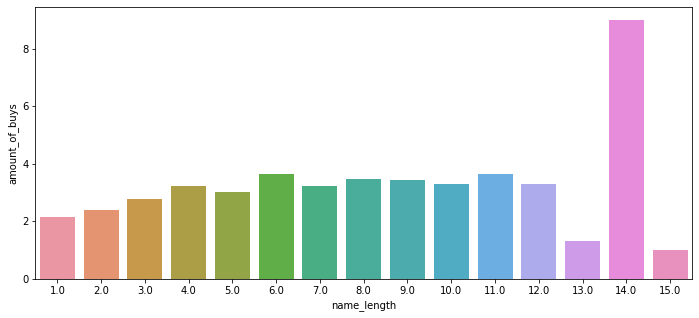

In [26]:
data = order_items[["order_id","product_id"]].merge(orders[["order_id","order_status"]], on="order_id")
data = data[data.order_status == "delivered"].groupby("product_id").agg({"order_id":"count"}).rename(columns={"order_id":"amount_of_buys"}).reset_index()
data1 = data.merge(products[["product_id","product_name_lenght"]], on="product_id").rename(columns={"product_name_lenght":"name_length"})
data1["name_length"] = data1["name_length"].apply(lambda x: x//5)
plt.figure(figsize=(40,5))
plt.subplot(131)
sns.barplot(data = data1.groupby("name_length").agg({"amount_of_buys":"mean"}).reset_index(), y="amount_of_buys",x="name_length")

## Задание 5* (1 балл) +

Имея полученные данные по товарам, чекам и категориям, а также сделав дополнительные расчеты (если необходимо), предположите:

1. Продавцов каких категорий необходимо привлекать в маркетплейс?

2. Какие категории в каких штатах необходимо развивать?

3. Развитие каких категорий не принесут большого эффекта и почему?

4. Какие рекомендации можно дать для продавцов, чтобы их товар лучше продавался?

In [27]:
temp_data = order_items[["product_id","seller_id"]].merge(sellers[["seller_id","seller_state"]], on=["seller_id"])
temp_data2 = temp_data.merge(products[["product_id","product_category_name"]],on=["product_id"])
temp_data3 = temp_data2.groupby(["seller_id", "product_category_name","seller_state"]).agg({"product_id":"count"}).reset_index().sort_values("product_id").drop_duplicates("seller_id", keep="last").rename(columns={"product_id":"amount"})
t = temp_data3.groupby("product_category_name").agg({"seller_id":"count"}).rename(columns={"seller_id":"sellers_amount"}).sort_values("sellers_amount").reset_index()
t[t.sellers_amount < int(t.mean() / 2)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,product_category_name,sellers_amount
0,pc_gamer,1
1,la_cuisine,1
2,flowers,1
3,furniture_mattress_and_upholstery,1
4,tablets_printing_image,1
5,fashion_sport,2
6,books_imported,2
7,dvds_blu_ray,2
8,audio,3
9,fashio_female_clothing,3


1) Так как у нас было подсчитано для каждой категории количество продавцов, у которых данная категория является основной. Поэтому я вел критерий, если у категории количество продавцов меньше чем среднее количество продавцов по всем категориям/2, то значит в данной категории мало продацев, а значит в эти категории нужно привлекать, так как маленькая конкуренция \\
2) У нас есть график в 2 задании, и мы можем сказать,что в маленькие штаты нужно все категории развивать, а для крупных нужно развивать те категории, которые стоят после символа "о" \\
3) Очевидно, что нет смысла развивать категории, которые и так популярны, так как конкуренция большая и тяжело будет входить на рынок (топ лучших можно посмотреть в 2 задании)

## Задание 6 (0.5 балла) +

Определите средний чек покупки (добавьте разбивку на стоимость самого заказ и стоимость доставки) и среднее число товаров в заказе

In [28]:
temp_data = orders[["order_id","order_status"]].merge(order_items[["order_id","order_item_id","price","freight_value"]], on = "order_id")
temp_data = temp_data[temp_data.order_status == "delivered"]
temp_data = temp_data.groupby("order_id").agg({"order_item_id":"max","price":"sum","freight_value":"sum"}).rename(columns={"order_item_id":"amount_of_goods","price":"price_of_goods","freight_value":"delivery_price"}).reset_index()
print("Mean of amount of goods", temp_data.amount_of_goods.mean())
print("Mean of price of cheque", (temp_data.price_of_goods + temp_data.delivery_price).mean())
temp_data

Mean of amount of goods 1.1421982213561641
Mean of price of cheque 159.82683876116832


,order_id,amount_of_goods,price_of_goods,delivery_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14
...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41
96474,fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53
96475,fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95
96476,fffe18544ffabc95dfada21779c9644f,1,55.99,8.72


## Задание 7 (0.2 балла) +

Определите среднее число покупок на пользователя (обратите внимание на идентификаторы)

In [29]:
temp_data = customers[["customer_unique_id","customer_id"]].merge(orders[["customer_id","order_id","order_status"]], on="customer_id")
temp_data[temp_data.order_status == "delivered"].groupby("customer_unique_id").agg({"order_id":"count"}).rename(columns={"customer_id":"amount_of_orders"}).mean()

order_id    1.03342
dtype: float64

In [30]:
temp_data = orders[['order_id', 'customer_id', 'order_status']].merge(customers[['customer_id', 'customer_unique_id']], on='customer_id')
temp_data1 = order_items.groupby('order_id').agg({'product_id': 'count'}).reset_index().rename(columns={"product_id": "pays"})
temp_data = temp_data.merge(temp_data1, on='order_id').sort_values('pays')
temp_data[temp_data.order_status == 'delivered'].groupby('customer_unique_id').agg({'pays': 'mean'}).reset_index().sort_values('pays')

,customer_unique_id,pays
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0
60518,a5c325fd2fff2e6dd34c33d2baf49b9e,1.0
60517,a5c30a5645d62469cf66c50953f84ad7,1.0
60515,a5c1bc60f6c90827fa62199f3fd04031,1.0
60514,a5c133a6a95d06f06939fd961fb8a0c3,1.0
...,...,...
90465,f7ea4eef770a388bd5b225acfc546604,14.0
6612,11f97da02237a49c8e783dfda6f50e8e,15.0
38579,698e1cf81d01a3d389d96145f7fa6df8,20.0
71566,c402f431464c72e27330a67f7b94d4fb,20.0


## Задание 8 (0.2 балла) +

Отобразите среднюю сумму оплаты по типу оплаты

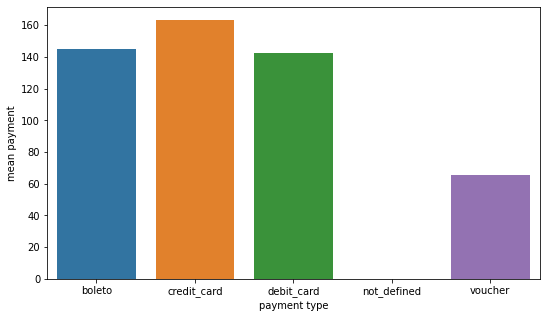

In [31]:
plt.figure(figsize=(30, 5))
plt.subplot(132)
sns.barplot(data=order_payments.groupby(["payment_type"]) \
    .agg({"payment_value": "mean"}) \
    .reset_index() \
    .rename(columns={"payment_value": "mean payment", "payment_type":"payment type"}) \
    , x="payment type", y="mean payment")

## Задание 9 (0.4 балла)

Обратите внимание на число платежей (payment_installments). Выясните, какая сумма оплаты указана: за целую покупку или только за ее часть?

Также покажите средний чек в зависимости от числа оплаты. Есть ли какая-то связь между ними?

In [32]:
order_payments[order_payments.order_id == "b81ef226f3fe1789b1e8b2acac839d17"]
#rder_items[order_items.order_id =="b81ef226f3fe1789b1e8b2acac839d17"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


## Задание 10 (0.4 балла) +

Визуализируйте зависимость между ценой заказа и ценой доставки по штатам покупки. Есть ли какая-нибудь зависимость и как вы можете ее обосновать?

In [33]:
data = customers[["customer_id","customer_state"]].merge(orders[["order_id","customer_id","order_status"]], on="customer_id")
data = data.merge(order_items[["order_id","price","freight_value"]], on="order_id")
data = data.groupby(["customer_state","order_id"]).agg({"price":"sum","freight_value":"sum"}).reset_index()

In [34]:
cols = customers.customer_state.unique()
print(cols)
fig = go.Figure()

data = data.sort_values("price")
#нарисуем все распределения
for col in cols:
  fig.add_trace(go.Scatter(x=data[data.customer_state == col].price, y = data[data.customer_state == col].freight_value, opacity=0.6))
    
# Наше меню для отображения
updatemenu= [dict()]

# Кнопки, на которые можно нажимать
buttons=[]

for i, col in enumerate(cols):
    visibles = [False] * len(cols)
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=["visible", visibles]
                        ))
    
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True

fig.update_layout(showlegend=False, updatemenus = updatemenu)
go.layout.Updatemenu(x=0, y=1)
fig.update_layout(
    title = {
        "text": "Product Category distribution",
        "x": 1
    })

fig.show()

['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']


В целом некая зависимость присутсвует, почти во всех штатах пока цена не достигнет 1000, четко видно зависимость, то есть при росте цены, растет цена за доставку

## Задание 11 (0.4 балла) +



Выведите график по числу покупок (в разбивке по статусам) и временем покупки (аггрегируйте покупки до дня)

In [35]:
def strip_date(x):
    x = parse(x)
    x = x.replace(minute=0)
    x = x.replace(second=0)
    x = x.replace(hour=0)
    return x


data = orders.copy()
cols = data.order_status.unique()

data["purchase_time"] = data.order_purchase_timestamp.apply(lambda x: strip_date(x))
data = data.groupby(["order_status","purchase_time"]).agg({"order_id":"count"}).reset_index()
fig = go.Figure()
for col in cols:
  fig.add_trace(go.Bar(x=data[data.order_status == col].purchase_time, y = data[data.order_status == col].order_id,opacity=0.6))

# Наше меню для отображения
updatemenu= [dict()]

# Кнопки, на которые можно нажимать
buttons=[]

for i, col in enumerate(cols):
    visibles = [False] * len(cols)
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=["visible", visibles]
                        ))
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True
fig.update_layout(showlegend=False, updatemenus = updatemenu)
go.layout.Updatemenu(x=0, y=1)
fig.update_layout(
    title = {
        "text": "Purchase time",
        "x": 0.5
    }
)

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

## Задание 12* (1 балл) +

Используя полученные данные, а также сделав дополнительные вычисления (если необходимо), предположите:

1. Есть ли сезонность в покупках на маркетплейсе?

2. Есть ли какие-то необъяснимые падение/рост продаж? С чем это может быть связано?

1) Как мы можем заметить с середины 17 года маркетплейс набрал неплохие обороты, и постепенно количество продаж росло, экстримальное количество продаж 24 ноября, скорее всего был какой-то праздник(но я не нашел ), потом был хорошое количество продаж в декабре, это неудивтельно, так как все закупаются к Новому Году и Рождеству Христова, также было очень много продаж в апреле и мае, так как в Бразилии аж 8 национальных праздников, поэтому некая сезонность
имеется, но не прям грандиозная \\
2)Есть только продажи в конце ноября, мы видим как подскочил график, но непонятно с чем это связано,так как вроде бы в этот период не было никаких праздников и событий, так что непонятно чем вызван этот рост

## Задание 13 (0.3 балла) +

Посчитайте CSAT (customer satisfaction - средняя оценка ревью) и отобразите средний CSAT по дням



In [36]:
def strip_date(x):
    x = parse(x)
    x = x.replace(minute=0)
    x = x.replace(second=0)
    return x

data = order_reviews.copy()
data = data.drop_duplicates("review_id")
data["reviewtime"] = data.review_creation_date.apply(lambda x: strip_date(x))

fig = go.Figure()

data = data.groupby("reviewtime").agg({"review_score": "mean"}).reset_index().rename(columns={"review_score":"CSAT"})

fig.add_trace(go.Bar(x=data.reviewtime, y=data.CSAT))

fig.update_layout(
    title = {
        "text": "CSAT",
        "x": 0.5
    }
)

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

## Задание 14 (0.3 балла) +

Найдите топ-5 лучших и топ-5 худших продавцов по средней оценке и посчитайте их число продаж

In [37]:
data = order_items[["order_id","seller_id"]].merge(order_reviews[["order_id","review_score"]], on="order_id")
data = data.drop_duplicates().reset_index()
data = data.groupby("seller_id").agg({"review_score":"mean"}).reset_index()
data.merge(order_items.groupby("seller_id").agg({"order_id":"nunique"}).reset_index(),on="seller_id").sort_values("review_score")

,seller_id,review_score,order_id
1901,9c57bc60cfad5ee62d35d3f1ce4593a1,1.0,1
1741,8e670472e453ba34a379331513d6aab1,1.0,1
394,20fd2d2080ed85fa67fad3fcbb2c1813,1.0,1
2656,dc120d932ddf9d4dfb6fd68beefda622,1.0,1
1773,90d4125885ab6c86e8820a722be71974,1.0,3
...,...,...,...
833,45a3d05fb00435e52a28859dd03703b3,5.0,1
2598,d7827b2af99326a03b0ed9c7a24db0d3,5.0,1
832,458d868c9642f55f18f04e951a3fdde6,5.0,2
141,0b1ca3ef18a63d7eb0c8897fa0849c08,5.0,1


## Задание 15 (0.3 балла) +

Посмотрите, как быстро отвечают пользователи (сделайте аггреграцию по дням) и влияет ли это на оценку?

In [38]:
data1 = orders[["order_id","order_delivered_customer_date","order_status"]].merge(order_reviews[["order_id","review_creation_date"]], on="order_id")
data1 = data1[data1.order_status == "delivered"]
data1 = data1.dropna()
data1["review_creation_date"] = data1["review_creation_date"].apply(lambda x: str(x))
data1["review_creation_date"] = data1["review_creation_date"].apply(lambda x: pd.to_datetime(x))
data1["order_delivered_customer_date"] = data1["order_delivered_customer_date"].apply(lambda x: str(x))
data1["order_delivered_customer_date"] = data1["order_delivered_customer_date"].apply(lambda x: pd.to_datetime(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



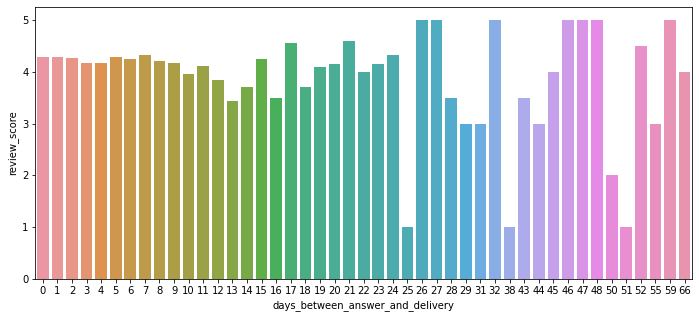

In [39]:
data1 = data1.groupby(["order_id"]).agg({"review_creation_date":"min", "order_delivered_customer_date":"min"}).reset_index()
data1["days_between_answer_and_delivery"] = (data1["review_creation_date"] - data1["order_delivered_customer_date"]).dt.days
plt.figure(figsize=(40,5))
plt.subplot(131)
data1 = data1.merge(order_reviews[["order_id","review_score"]], on=["order_id"]).drop_duplicates("order_id").reset_index()
data1 = data1[data1.days_between_answer_and_delivery >= 0].groupby("days_between_answer_and_delivery").agg({"review_score":"mean"}).reset_index()
sns.barplot(data = data1, y="review_score",x="days_between_answer_and_delivery")


## Задание 16 (0.5 балла) +

Отобразите распределение оценок для заказов, которые были доставлены вовремя и которые пришли с опозданием. Насколько влияет факт опоздания на оценку?

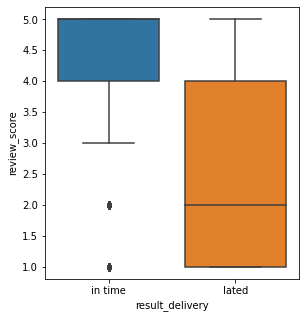

In [40]:
d = {False:"lated",True:"in time"}
data = orders[orders.order_status == "delivered"]
data = data.merge(order_reviews.groupby("order_id").agg({"review_score":"min"}).reset_index(), on="order_id")
data["result_delivery"] = data["order_delivered_customer_date"] <= data["order_estimated_delivery_date"]
data["result_delivery"]= data["result_delivery"].apply(lambda x: d[x])
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(data=data, x='result_delivery', y='review_score')

## Задание 17* (1,5 балла)

Есть ли среди пользователей хейтеры? Определите их и вычислите средний CSAT без их участия

In [41]:
data = orders[orders.order_status == "delivered"][["order_id","customer_id"]].merge(order_reviews[["order_id","review_score"]], on="order_id")
data = data.merge(customers[["customer_id","customer_unique_id"]],on="customer_id")
data.groupby("customer_unique_id").agg({"review_score":"mean"}).reset_index().review_score.unique()

array([5.        , 4.        , 3.        , 1.        , 4.5       ,
       2.        , 3.5       , 4.33333333, 4.66666667, 2.5       ,
       2.66666667, 2.33333333, 3.66666667, 3.75      , 3.6       ,
       4.6       , 1.5       , 3.33333333, 2.77777778, 1.66666667,
       4.85714286, 4.25      , 4.2       , 1.33333333, 3.8       ,
       4.75      , 3.25      , 4.14285714, 2.8       , 4.8       ,
       3.4       , 1.8       ])

## Задание 18 (0.4 балла) +

Изобразите зависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку "есть заказ из другого штата". Есть ли зависимость?

In [42]:
data_payment_sum = order_payments.groupby("order_id").agg({"payment_value":"sum"})

In [43]:
data_customer = orders[orders.order_status == "delivered"][["order_id","customer_id","order_purchase_timestamp","order_delivered_customer_date"]].merge(customers[["customer_id","customer_state"]],on="customer_id")
data_customer_payment_sum = data_customer.merge(data_payment_sum, on="order_id")
data_customer_payment_sum = data_customer_payment_sum.dropna()
data_customer_payment_sum["order_purchase_timestamp"] = data_customer_payment_sum["order_purchase_timestamp"].apply(lambda x: pd.to_datetime(str(x)))
data_customer_payment_sum["order_delivered_customer_date"] = data_customer_payment_sum["order_delivered_customer_date"].apply(lambda x: pd.to_datetime(str(x)))
data_customer_payment_sum["days_between_payment_and_delivery"] = (data_customer_payment_sum["order_delivered_customer_date"] - data_customer_payment_sum["order_purchase_timestamp"]).dt.days
data_customer_payment_sum

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,customer_state,payment_value,days_between_payment_and_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,SP,38.71,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,BA,141.46,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,GO,179.12,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42,RN,72.20,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02,SP,28.62,2
...,...,...,...,...,...,...,...
96472,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-17 15:08:01,SP,85.08,8
96473,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-28 17:37:56,SP,195.00,22
96474,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-09-21 11:24:17,BA,271.01,24
96475,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-25 23:32:54,RJ,441.16,17


In [44]:
data_customer_sellers = order_items[["order_id","seller_id"]].merge(data_customer[["order_id","customer_state"]],on="order_id")
data_customer_sellers = data_customer_sellers.merge(sellers[["seller_id","seller_state"]], on="seller_id")
data_customer_sellers["same_state"] = (data_customer_sellers["customer_state"] ==  data_customer_sellers["seller_state"])
data_customer_sellers = data_customer_sellers.groupby("order_id").agg({"same_state":"max"}).reset_index()

In [45]:
d = {True:"same_state",False:"different_state"}
data_end = data_customer_sellers.merge(data_customer_payment_sum[["order_id","payment_value","days_between_payment_and_delivery"]],on="order_id")
data_end["same_state"] = data_end["same_state"].apply(lambda x: d[x])
data_end[data_end.order_id == "0812eb902a67711a1cb742b3cdaa65ae"]

,order_id,same_state,payment_value,days_between_payment_and_delivery
3068,0812eb902a67711a1cb742b3cdaa65ae,different_state,6929.31,18


In [46]:
cols = data_end.same_state.unique()

fig = go.Figure()

data_end = data_end.sort_values("days_between_payment_and_delivery")
#нарисуем все распределения
for col in cols:
  fig.add_trace(go.Bar(x=data_end[data_end.same_state == col].groupby("days_between_payment_and_delivery").agg({"payment_value":"mean"}).reset_index().days_between_payment_and_delivery, y = data_end[data_end.same_state == col].groupby("days_between_payment_and_delivery").agg({"payment_value":"mean"}).reset_index().payment_value, opacity=0.6))
    
# Наше меню для отображения
updatemenu= [dict()]

# Кнопки, на которые можно нажимать
buttons=[]

for i, col in enumerate(cols):
    visibles = [False] * len(cols)
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=["visible", visibles]
                        ))
    
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True

fig.update_layout(showlegend=False, updatemenus = updatemenu)
go.layout.Updatemenu(x=0, y=1)
fig.update_layout(
    title = {
        "text": "the relationship between the order price and the number of days between purchase and delivery",
        "x": 0.5
    })

fig.show()

## Задание 19 (0.6 баллов) +?

Отобразите на карте все точки продавцов (если они находятся в одном месте, то необходимо отметить кол-во)

Где больше всего продавцов находится?

In [47]:
data = sellers[["seller_id","seller_zip_code_prefix","seller_city"]].rename(columns={"seller_zip_code_prefix":"zip_code"}).merge(geolocation[["geolocation_zip_code_prefix","geolocation_lat","geolocation_lng"]].rename(columns={"geolocation_zip_code_prefix":"zip_code"}), on="zip_code",how="left")
data = data.drop_duplicates("seller_id")
data.zip_code.nunique()
data1 = data.groupby("seller_city").agg({"seller_id":"count"}).reset_index()
data1["seller_id"] = data1["seller_id"].apply(lambda x: str(x))
data1

,seller_city,seller_id
0,04482255,1
1,abadia de goias,1
2,afonso claudio,1
3,aguas claras df,1
4,alambari,1
...,...,...
606,volta redonda,2
607,votorantim,4
608,votuporanga,4
609,xanxere,2


In [48]:
fig = go.Figure(go.Scattermapbox(lat=data['geolocation_lat'], lon=data['geolocation_lng'], text=data['seller_city']))
capital = data[data['seller_city']=='brasilia']
map_center = go.layout.mapbox.Center(lat=capital['geolocation_lat'].values[0], lon=capital['geolocation_lat'].values[1])
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=5))
fig.show()

## Задание 20 (1,5 балл) 1/2 +

Определите топ-5 продавцов, которые чаще всего отсылают свою посылку в другие регионы и визуализируйте их отсылки

In [49]:
data_customer = orders[orders.order_status == "delivered"][["order_id","customer_id","order_purchase_timestamp","order_delivered_customer_date"]].merge(customers[["customer_id","customer_state"]],on="customer_id")
data_customer_sellers = order_items[["order_id","seller_id"]].merge(data_customer[["order_id","customer_state"]],on="order_id")
data_customer_sellers = data_customer_sellers.merge(sellers[["seller_id","seller_state"]], on="seller_id")
data_customer_sellers["different_state"] = (data_customer_sellers["customer_state"] !=  data_customer_sellers["seller_state"])
data_customer_sellers = data_customer_sellers.groupby("seller_id").agg({"different_state":"sum"}).reset_index().sort_values(by=["different_state"], ascending=False)
data_customer_sellers

,seller_id,different_state
358,1f50f920176fa81dab994f9023523100,1249
1190,6560211a19b47992c3666cc44a7e94c0,1116
858,4a3ca9315b744ce9f8e9374361493884,1071
2388,cc419e0650a3c5ba77189a1882b7556a,1042
188,1025f0e2d44d7041d6cf58b6550e0bfa,918
...,...,...
435,26562f211dd1364af2a8596dc945e8ae,0
436,265fdc289dffa9f1ad801c74f7d0de47,0
438,269c5fc9fcadee614364c3620c30a1f9,0
439,269cff2d3c8d205c11f37a52402ea93b,0


## Задание 21* (2 балла)

Сделайте анимацию по датам с доставкой между продавцами и пользователями

## Задание 22* (творческое, отдельно поставим баллы) +

Проведите дополнительно исследование между параметрами, которые вам интересны и могут быть полезными (обоснуйте, зачем это смотреть). Сделайте выводы

хочу посмотреть какие размеры товаров более востребованы, и сказать с какими товарами по размеру легче заходить на рынок

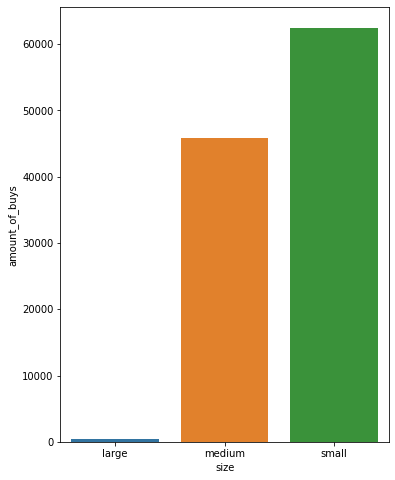

In [50]:
border_left = 0
border_middle1 = 0
border_middle2 = 0
border_max = 0

def SetStatus(volume):
  if (border_left <= volume <= border_middle1):
    return "small"
  if (border_middle1 <= volume <= border_middle2):
    return "medium"
  if ((border_middle2 <= volume <= border_max)):
    return "large"

data = order_items[["order_id","product_id"]].merge(orders[["order_id","order_status"]], on="order_id")
data = data[data.order_status =="delivered"]
data = data.groupby("product_id").agg({"order_id":"count"}).reset_index().rename(columns={"order_id":"amount_of_buys"})
data = data.merge(products[["product_id","product_length_cm","product_height_cm","product_width_cm"]],on="product_id")
data["volume"] = data["product_length_cm"] * data["product_height_cm"] * data["product_width_cm"]
data.sort_values(by=["amount_of_buys"],ascending=False)
border_left = data.volume.min()
border_middle1 = int((data.volume.min() + int(data.volume.mean()))/2)
border_middle2 = int((data.volume.max() + int(data.volume.mean()))/2)
border_max = data.volume.max()
data["size"] = data["volume"].apply(lambda x: SetStatus(x))
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.barplot(data = data.groupby("size").agg({"amount_of_buys":"sum"}).reset_index(), y="amount_of_buys",x="size")

## Попугай для ДЗ

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Rose-ringed_parakeet_%28Psittacula_krameri_manillensis%29.jpg/1024px-Rose-ringed_parakeet_%28Psittacula_krameri_manillensis%29.jpg)

А это ожереловый попугай (или индийский кольчатый попугай). Этот вид явно выделяет наличие такого колечка на шее. Самый распространенный попугай в мире

Они очень хорошо и быстро летают, но ходят максимально неуклюже)

В отличии от многих попугаев, для которых человеческая деятельность является вредом и уменьшает их естественный ареал обитания, то как раз для этих птиц человеческая деятельность - это плюс, потому что они находят корм внутри человеческих обществ (не боятся людей, лучше всего приспосабливаются, едят пшеницу). Поговаривают, что в качестве домашних попугаев их держали еще в древней Греции и Риме, а в  средневековой Индии ожереловые попугаи часто были питомцами знатных особ и монархов, причём владение этим попугаем считалось элементом роскоши и престижа